# Spearman correlation

Import libraries

In [80]:
import pandas as pd
import glob
from scipy.stats import spearmanr
import seaborn as sns
import numpy as np

Read suicide csv

In [2]:
suicide = pd.read_csv('../Suicide/suicide_count.csv', sep=',')

Read CIHABR files

In [3]:
year = "17"
disease = ""
all_files = glob.glob("*.csv")
diseases_list = []
corrs_list = []
for file in all_files:
    disease = file.split(year)[1].split('.')[0]
    ciha = pd.read_csv('CIHABR' + year + disease + '.csv', sep=',')
    ciha = ciha[["QUANTIDADE", "MUNCOD"]]
    
    # Merge Files
    result = pd.merge(ciha, suicide, left_on="MUNCOD", right_on="CODMUNOCOR", how="inner")
    result = result[["QUANTIDADE", "SUICIDES"]]
    
    # Spearman correlation
    ciha_array = result.iloc[:,0].values
    suicides_array = result.iloc[:,1].values
    corr, p_value = spearmanr(ciha_array,suicides_array)
    
    # Append correlation
    diseases_list.append(disease)
    corrs_list.append(corr)

Spearman correlations table

In [4]:
corrs_data = {'Doenças': diseases_list, 'Correlação com suicidio': corrs_list}
corrs_df = pd.DataFrame(data=corrs_data)
corrs_df

,Doenças,Correlação com suicidio
0,HIV,0.532166
1,MENTAL,0.464292
2,NEOPLASIA,0.655823
3,OLHO,0.414425


Table with diseases and suicide numbers merged per city

In [5]:
result = suicide
for file in all_files:
    disease = file.split(year)[1].split('.')[0]
    ciha = pd.read_csv('CIHABR' + year + disease + '.csv', sep=',')
    ciha = ciha[["QUANTIDADE", "MUNCOD"]]
    ciha.rename(columns={"QUANTIDADE": disease}, inplace=True)
    
    # Merge with current dataframe
    result = pd.merge(ciha, result, left_on="MUNCOD", right_on="CODMUNOCOR", how="inner")

# Add SUICIDES to columns
result = result[diseases_list + ["SUICIDES"]]
result

,HIV,MENTAL,NEOPLASIA,OLHO,SUICIDES
0,4,23,154,245,36
1,1,32,136,1,29
2,30,80,1911,58,90
3,82,199,4059,261,41
4,3,80,444,44,16
...,...,...,...,...,...
115,8,60,455,64,32
116,1,161,91,78,4
117,1,2,437,6,19
118,1,14,287,242,7


Heatmap of the diseases and suicide

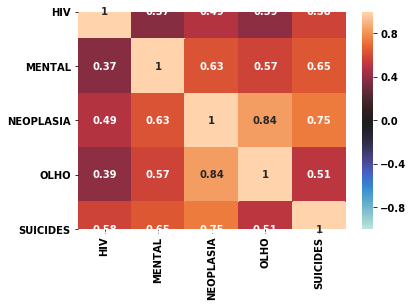

In [6]:
sns.heatmap(result.corr(), annot=True, vmin=-1, vmax=1, center=0)

## AIDS

Dados provenientes de http://www2.aids.gov.br/cgi/deftohtm.exe?tabnet/sp.def

In [81]:
aids = pd.read_csv('../Spearman/AIDSBR2017.csv', sep=',')

In [17]:
# Merge Files
result = pd.merge(aids, suicide, left_on="MUNCOD", right_on="CODMUNOCOR", how="inner")
result = result[["QUANTIDADE", "SUICIDES"]]

# Spearman correlation
ciha_array = result.iloc[:,0].values
suicides_array = result.iloc[:,1].values
corr, p_value = spearmanr(ciha_array, suicides_array)

In [19]:
corr

0.6782271970546467

## Tuberculose

Dados provenientes de http://tabnet.datasus.gov.br (cabeçalhos adaptados)

In [82]:
tuberculose = pd.read_csv('../Spearman/TUBERCULOSEBR2017.csv', sep=';')

In [83]:
tuberculose.head()

,MUNICIPIO,QUANTIDADE
0,110001 Alta Floresta D'Oeste,4
1,110040 Alto Paraíso,1
2,110034 Alvorada D'Oeste,1
3,110002 Ariquemes,43
4,110045 Buritis,5


In [84]:
tuberculose['MUNCOD'] = tuberculose['MUNICIPIO'].str.extract('(\d+)')
tuberculose['MUNCOD'] = tuberculose['MUNCOD'].astype(np.int64)
tuberculose = tuberculose[['MUNCOD', 'QUANTIDADE']]

In [85]:
tuberculose.head()

,MUNCOD,QUANTIDADE
0,110001,4
1,110040,1
2,110034,1
3,110002,43
4,110045,5


In [86]:
# Merge Files
result = pd.merge(tuberculose, suicide, left_on="MUNCOD", right_on="CODMUNOCOR", how="inner")
result = result[["QUANTIDADE", "SUICIDES"]]

# Spearman correlation
ciha_array = result.iloc[:,0].values
suicides_array = result.iloc[:,1].values
corr, p_value = spearmanr(ciha_array, suicides_array)

In [87]:
corr

0.5676674495267491